<h1>데이터 가공하기 (Feature Engineering)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-가공하기(Feature-Engineering)" data-toc-modified-id="데이터-가공하기(Feature-Engineering)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 가공하기(Feature Engineering)</a></span><ul class="toc-item"><li><span><a href="#데이터-가공하기(Feature-Engineering)란?" data-toc-modified-id="데이터-가공하기(Feature-Engineering)란?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터 가공하기(Feature Engineering)란?</a></span></li><li><span><a href="#데이터-가공하기(Feature-Engineering)의-여러-방법" data-toc-modified-id="데이터-가공하기(Feature-Engineering)의-여러-방법-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 데이터 가공하기(Feature Engineering)의 여러 방법</a></span></li></ul></li><li><span><a href="#연산으로-열-만들기" data-toc-modified-id="연산으로-열-만들기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>연산으로 열 만들기</a></span><ul class="toc-item"><li><span><a href="#객체-간-연산으로-열-만들기" data-toc-modified-id="객체-간-연산으로-열-만들기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>객체 간 연산으로 열 만들기</a></span></li><li><span><a href="#수학-함수들을-적용해-열-만들기" data-toc-modified-id="수학-함수들을-적용해-열-만들기-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>수학 함수들을 적용해 열 만들기</a></span></li></ul></li></ul></div>

##1. 데이터 가공하기(Feature Engineering)
우리는 6단원을 통해서 수집된 데이터를 정제(data cleaning)할 수 있었고, 7단원을 통해 여러 개의 정제된 데이터를 결합하게 되었다. 그렇게 처리된 데이터는 데이터 가공(feature engineering)을 통해 우리에게 보다 유용한 데이터가 된다.

### 1.1 데이터 가공하기(Feature Engineering)란?
특성공학(Feature Engineering)은 데이터 전처리 과정에서 새로운 관측치의 추가 없이 주어진 데이터로 보다 업무에 효율적인 데이터로 만드는 과정이다. df1은 야구선수들의 가상의 데이터를 모아둔 데이터프레임이다.

In [2]:
import pandas as pd
data1 = [['A', 0.1, 50, 0, 5],
         ['B', 0.25, 400, 40, 99],
         ['C', 0.35, 100, 10, 36],
         ['D', 0.3, 300, 4, 91]]
df1 = pd.DataFrame(data1, columns=['선수', '적중률', '타수', '홈런', '안타'])
df1

,선수,적중률,타수,홈런,안타
0,A,0.10,50,0,5
1,B,0.25,400,40,99
2,C,0.35,100,10,36
3,D,0.30,300,4,91


df1은 각 선수별 시즌의 타수와 홈런 및 안타가 집계되어 있다. 그리고 특이하게도 선수별 적중률의 데이터가 담겨있다. 야구에서 말하는 적중률(hard hit rate)은 전체 타구중에 배트 중심에 강하게 맞은 타구의 비율을 나타낸다. 우리는 적중률이 시즌 통산 홈런과 시즌 통산안타와 같은 스탯에 영향을 미친다는 가설을 세웠다. df1으로 검토해보자. 
<br>
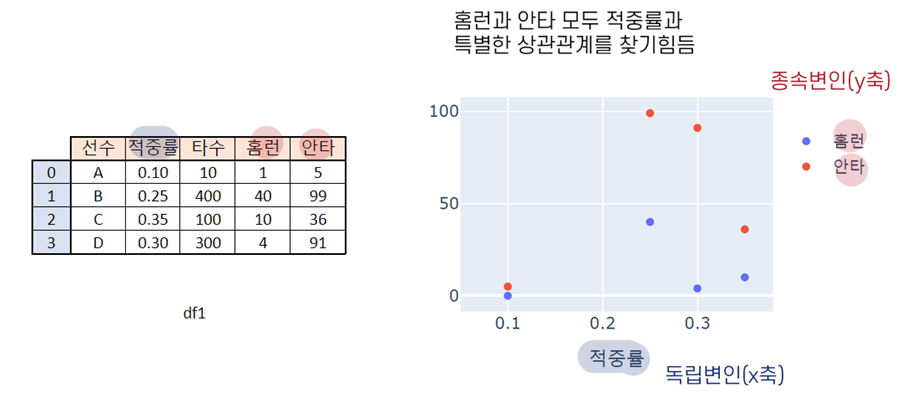
<br>

적중률을 독립변인으로 홈런과 안타를 종속변인으로 그린 그래프는 
위와 같다. 독립변인은 우리가 원인으로 설정한 것이다. 우리는 타구의 적중률에 따라 홈런과 안타의 스탯이 변할 것이라는 가설을 세웠기 때문에 독립변인은 적중률이다. 흔히 그래프에서 x축에 위치한 것이 독립변인이다. 가설이 틀려서 실제로는 원인이 아니더라도 독립변인은 원인으로 설정한 것이기에 관계는 없다. 원인이 독립변인이라면 결과로 설정한 것은 종속변인이다. 흔히 y축에 위치한 값이다. 여기서는 홈런과 안타가 독립변인이다. 위 그래프만으로는 적중률이 시즌 통산 홈런과 안타에 특별한 영향을 미쳤다고 보기 힘들다.

이 때 df1에 타율이라는 새로운 열을 만들어보자. 타율은 총 안타수를 총 타수를 나눈 타수당 안타율의 스탯이다. 시리즈 끼리의 연산을 이용하면 손쉽게 만들 수 있다. 그리고 새로 만들어진 타율 열과 적중률의 그래프를 그려보자.

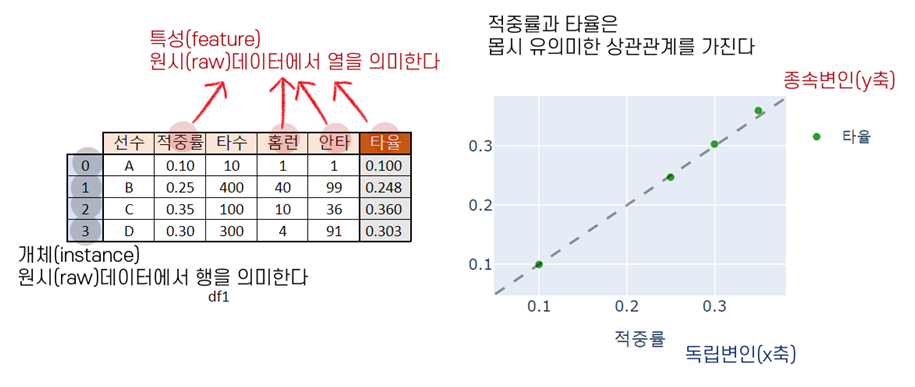

적중률과 시즌 통산 홈런 및 안타는 별다른 상관관계가 없었지만, 적중률과 타율은 정비례하는 상관관계를 가지고 있다. 아무래도 적중률도  야구에서 타율처럼 비율을 나타낸 스탯을 일컫는 용어. 홈런이나 안타와 같은 누적 개수를 나타내는 스탯은 누적스탯이라고 한다.
비율스탯이고 타율도 비율스탯이라 보다 직관적이고 유의미한 상관관계를 가지고 있는 것 같다. 타율이라는 스탯은 최초 수집된 결과에는 없었지만, 이미 수집된 타수와 안타의 데이터를 이용해 만들어내니 우리가 원하는 적중률과 관계가 깊은 결과를 찾을 수 있었다.

원시(raw) 데이터에서 행은 각 개체(instance)를 의미한다. df1의 경우에도 각 행은 각 선수라는 개체들의 데이터이다. 원시 데이터의 열은 주로 데이터의 특성(feature)을 의미한다. 주로 독립변인이나 종속변인으로 사용되는 모든 것이 특성(feature)이다. 적중률과 관계가 높은 스탯을 찾는 목적에 이미 수집된 안타와 홈런이라는 특성(feature)으로는 목적을 달성하지 못했다. 이미 수집된 타수 안타라는 특성(feature)으로 새로운 타율이라는 특성(feature)을 만들어냈더니 우리의 목적을 달성할 수 있었다. 이렇게 데이터 전처리 과정에서 주어진 데이터로 보다 적합한 데이터로 만드는 것을 특성공학(feature engineering)이라고 한다. 

특성공학은 뜻은 기존의 데이터로 새로운 열 만들기라고 이해해도 좋다. 다만 아무래도 특성공학이라는 번역이 아주 와닿는 표현은 아니기에 용어를 가볍게 이해하고 싶은 분들을 위해 이 책에서는 데이터 가공하기라고 하겠다. 

### 데이터 가공하기(Feature Engineering)의 여러 방법
df1의 예에서처럼 데이터 가공하기(feature engineering)는 각 열의 연산으로도 가능하다. 혹은 통계함수를 사용해서 새로운 특성(feature)을 만들 수도 있다. 아니면 데이터의 범주화를 통해 새로운 특성을 만들 수도 있다. 이 과정에서 여러 가지 판다스 함수가 쓰일 것이다. 이번 단원에서 다양한 형태의 데이터 가공하기를 학습해보자. 다양한 판다스 함수를 이용해 기존 데이터로 새로운 열을 만들어보자는 이야기다.

## 연산으로 열 만들기
원시(raw)데이터에서 다양한 연산으로 새로운 특성(feature) 즉 새로운 열을 만들 수 있다. 연산은 이미 
앞 단원에서 충분히 학습했고, 그 결과를 새로운 열로 만드는 것도 이미 실습한 부분이니 간단하게 요약 정리하자.

### 객체 간 연산으로 열 만들기
객체 간 연산은 
앞에서 배운 바와 같이 데이터 프레임간의 연산이나 시리즈간의 연산 혹은 데이터 프레임과 시리즈간의 연산을 의미한다. 하나의 데이터프레임 안에 있는 두 개의 열 즉 두 개의 시리즈를 연산하는 것은 객체 내 연산이라고 생각될 수도 있지만, 시리즈간의 연산이기에 객체 간 연산이다. 어떤 연산인지 규정하는 것은 아주 중요한 것은 아니고 이미 학습된 부분이니 간단하게 df1으로 실습해보자. 


In [3]:
df1['타율'] = df1['안타'] / df1['타수']
df1

,선수,적중률,타수,홈런,안타,타율
0,A,0.10,50,0,5,0.100000
1,B,0.25,400,40,99,0.247500
2,C,0.35,100,10,36,0.360000
3,D,0.30,300,4,91,0.303333


시리즈간의 연산은 연산자를 사용하는 것만으로 각 시리즈 전체가 벡터화연산을 한다. 셀 끼리 연산을 한다는 이야기다. 그래서 각 안타열을 타수 열로 나눔으로 간단하게 타율열을 만들 수 있다. 

### 수학 함수들을 적용해 열 만들기
우리가 데이터를 수집한 특성(feature)들이 수학 함수인 log함수나 지수함수로 적용한 결과가 더 활용하기 편한 경우도 있다. df2로 실습해보자.

In [5]:
df2 = pd.DataFrame([[1, 2], [2, 4], [3, 8], [4, 16]], columns=['x', 'y'])
df2

,x,y
0,1,2
1,2,4
2,3,8
3,4,16


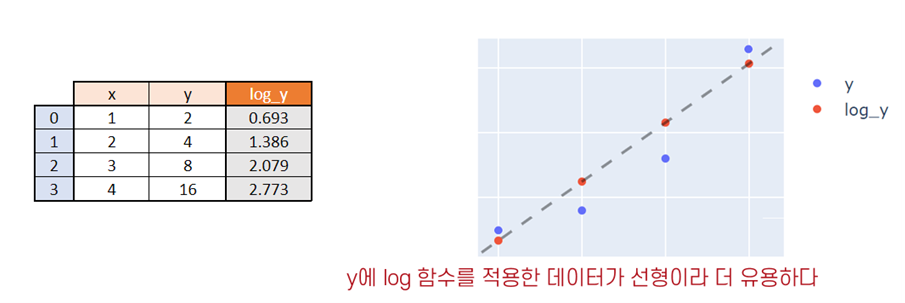
<br>
df2에서 y열에 log를 적용하면 x와 선형 상관관계(linear correlation) 결과가 나온다. 그렇기에 y열에 log 함수를 적용한 데이터를 log_y열로 만들어주고 싶다. 판다스에서는 수학적 함수들은 넘파이 라이브러리의 함수를 차용한다. 시리즈와 데이터프레임 모두 넘파이의 어레이를 기반으로 만들어졌기에  물론 넘파이 함수를 적용하려면 import numpy 가 필요하다.
넘파이 함수를 대부분 그냥 적용할 수 있다. 넘파이에는 자연로그를 적용하는 np.log 함수가 있다.

In [7]:
import numpy as np
pd.options.display.float_format = '{:.3f}'.format # 소수점 세자리 까지만 출력
df2['log_y'] = np.log(df2['y'])
df2

,x,y,log_y
0,1,2,0.693
1,2,4,1.386
2,3,8,2.079
3,4,16,2.773


자연로그 뿐 아니라 밑이 2인 log 함수는 np.log2, 밑에 10인 log 함수는 np.log10으로 가능하다. 그 외의 밑을 가진 log 함수를 적용하고 싶다면 log의 공식을 이용하라.

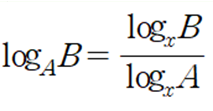

삼각함수도 넘파이 함수를 사용하면 된다. 삼각함수의 sin을 적용하고 싶다면 np.sin 함수를 사용하면 된다. 다만 기본값이 라디안(radian) 단위니까 도(degree)단위를 적용하고 싶다면 단위를 환산해야 한다.
- 360° = 2π radian 이므로 χ° = π/180 radian 이다 

π는 넘파이에서 np.pi로 부를수 있다. sin 90도의 값을 구하고 싶다면 아래와 같은 코드로 가능하다.

In [10]:
sin_90 = np.sin(90 * np.pi/180)
sin_90

1.0

- 그 외의 넘파이에서 사용할 수 있는 다양한 수학 함수는 아래와 같다.

| 함수      | 설명                         |
|-----------|------------------------------|
| np.log    | 자연로그(밑이 e)             |
| np.log2   | 밑이 2인 log                 |
| np.log10  | 밑이 10인 log                |
| np.sin    | 삼각함수 sin                 |
| np.cos    | 삼각함수 cos                 |
| np.tan    | 삼각함수 tan                 |
| np.arcsin | 삼각함수 sin의 역함수 arcsin |
| np.arccos | 삼각함수 cos의 역함수 arccos |
| np.arctan | 삼각함수 tan의 역함수 arctan |
| np.exp    | e의 지수함수                 |
| np.square | 제곱                         |
| np.sqrt   | 제곱근                       |

이런 함수들은 외우는 것이 아니라 필요할 때 찾아서 사용하면 된다.